In [ ]:
'''

Assignment 5: Customer Churn Prediction
Dataset: Telecom Churn
Link: https://raw.githubusercontent.com/blastchar/telco-customer-churn/master/WA_Fn-UseC_-
Telco-Customer-Churn.csv
Task:
 Predict if customer will churn.
 Impute missing values.
 Label encode categorical columns.
 StandardScaler for numeric fields.
 Train GaussianNB and evaluate.

'''

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('Telco_Customer_Churn_Dataset  (1) (1).csv')  ## load the dataset

In [90]:
df  ## show the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [91]:
df.columns  ## columns name of the dataset

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [92]:
df.isnull().sum()  ## check null value 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [93]:
df1 = df.drop(['customerID'],axis=1)  ## drop unnecessary column

In [94]:
df1  ## show the new dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [95]:
## unique value of each column
for i in range(df1.shape[1]):
    print(f'Unique value of {df1.columns[i]} is : ',df1[df1.columns[i]].unique(),'\n\n')

Unique value of gender is :  ['Female' 'Male'] 


Unique value of SeniorCitizen is :  [0 1] 


Unique value of Partner is :  ['Yes' 'No'] 


Unique value of Dependents is :  ['No' 'Yes'] 


Unique value of tenure is :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 


Unique value of PhoneService is :  ['No' 'Yes'] 


Unique value of MultipleLines is :  ['No phone service' 'No' 'Yes'] 


Unique value of InternetService is :  ['DSL' 'Fiber optic' 'No'] 


Unique value of OnlineSecurity is :  ['No' 'Yes' 'No internet service'] 


Unique value of OnlineBackup is :  ['Yes' 'No' 'No internet service'] 


Unique value of DeviceProtection is :  ['No' 'Yes' 'No internet service'] 


Unique value of TechSupport is :  ['No' 'Yes' 'No internet service'] 


Unique value of StreamingTV is :  ['No' 'Yes' 'No internet service'

In [96]:
df1['Churn'].value_counts()  ## value counts of this dataset

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [97]:
## Label Encoder -->Churn,TotalCharges,PaymentMethod ,PaperlessBilling , Contract ,  StreamingMovies ,StreamingTV , TechSupport , DeviceProtection,OnlineBackup ,OnlineSecurity ,InternetService,MultipleLines,PhoneService,Dependents,Partner,gender

## Scaling -->TotalCharges,MonthlyCharges ,tenure

In [98]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [99]:
## write column name for using label encoder
col1 = ['Churn','TotalCharges','PaymentMethod' ,'PaperlessBilling' , 'Contract' ,  'StreamingMovies' ,'StreamingTV' , 'TechSupport' , 'DeviceProtection','OnlineBackup' ,'OnlineSecurity' ,'InternetService','MultipleLines','PhoneService','Dependents','Partner','gender']

In [100]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'],errors = 'coerce')  ## convert value to numeric

In [101]:
df1['TotalCharges'].values  ## show the value of this column

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [102]:
df1['TotalCharges'].isnull().sum()  ## null check

11

<Axes: >

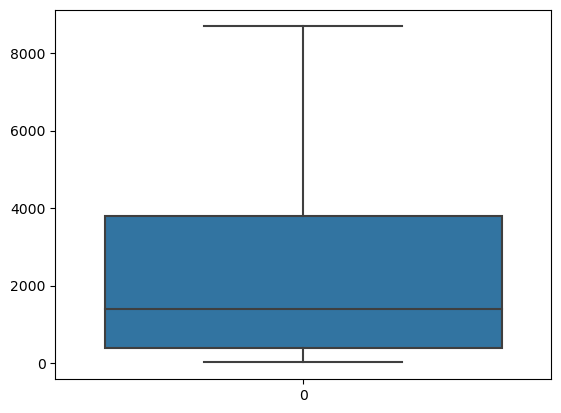

In [103]:
sns.boxplot(df1['TotalCharges'])  ## show boxplot of this column

In [104]:
df1['TotalCharges'] = df1['TotalCharges'].fillna(df1['TotalCharges'].mean())  ## fill null value with mean of this column

In [105]:
col2 = ['MonthlyCharges' , 'TotalCharges' ,'tenure']  ## write numericl continuous columns

In [106]:
df1[col2].corr()  ## correlation of these columns

,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.650468,0.247900
TotalCharges,0.650468,1.000000,0.824757
tenure,0.247900,0.824757,1.000000


In [107]:
le = LabelEncoder()  ## create object of label encoder

In [108]:
df1[col1] = df1[col1].apply(le.fit_transform) ## apply label encoder

In [109]:
df1.head()  ## show new dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,674,1


In [110]:
x = df1.drop(['Churn'],axis=1)

In [111]:
y = df1['Churn']

In [112]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)  ## spliting 80% for training and 20% for testing

In [114]:
scaler = StandardScaler() #3 create object of standard scaler

In [115]:
## apply standard scaler
x_train[col2] = scaler.fit_transform(x_train[col2])
x_test[col2] = scaler.transform(x_test[col2])

In [116]:
x_train.head()  ## show x_train dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1914,0,0,0,0,-1.202258,1,2,0,0,0,0,2,2,0,0,0,2,-0.003616,-1.209333
6345,0,1,0,0,-1.243070,1,2,0,0,2,0,0,0,0,0,1,1,-0.271462,-1.308297
2435,0,0,0,1,-0.753335,1,0,0,0,0,2,0,2,0,0,1,1,-0.163326,-0.481024
4422,1,0,0,0,-0.100355,1,0,1,0,2,0,0,2,2,1,1,0,1.074423,0.647263
6597,0,0,0,0,-1.039013,1,0,0,0,0,0,2,2,2,0,1,1,0.201011,-0.832550


In [117]:
from sklearn.naive_bayes import GaussianNB

In [118]:
gnb = GaussianNB()  ## create object of gaussian naive bayes

In [119]:
gnb.fit(x_train , y_train) ## fit the model

,priors,None
,var_smoothing,1e-09


In [120]:
y_pred = gnb.predict(x_test)  ## predict of the model

In [121]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [122]:
accuracy_score(y_test,y_pred)  ## check accuracy score

0.7615330021291696

[[766 243]
 [ 93 307]]


Text(50.722222222222214, 0.5, 'Actual Values')

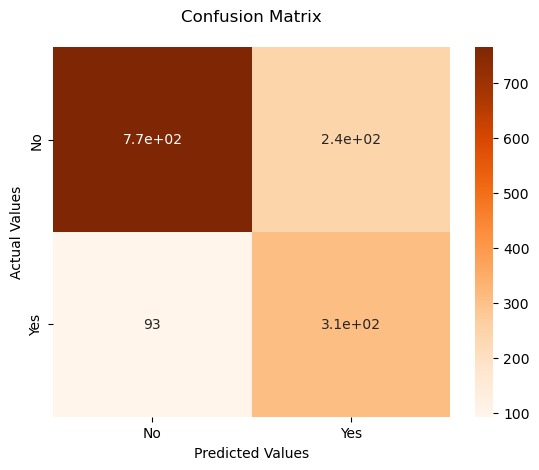

In [131]:
## show confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='Oranges',xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.title('Confusion Matrix\n')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [124]:
print(classification_report(y_test,y_pred))  ## show classification report

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1009
           1       0.56      0.77      0.65       400

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



In [ ]:
'''

Model Interpretation :
           1.  Data Preprocessing Interpretation:

                        Missing values were handled properly, ensuring no bias from incomplete records.
                        Label Encoding converted categorical variables into numeric form suitable for modeling.
                        Standard Scaling normalized numerical features, which is important for Gaussian Naive Bayes since it assumes normally distributed features.
                        The preprocessing steps made the dataset compatible with probabilistic modeling.
            2. Gaussian Naive Bayes Model Interpretation:
                        Gaussian Naive Bayes assumes that numerical features follow a normal (Gaussian) distribution.
                        This assumption is reasonable for scaled telecom usage features such as tenure, charges, and call durations.
                        The model is simple, fast, and interpretable, making it suitable as a baseline churn model.
            3. Overall Model Performance :
                        Accuracy = 76%, indicating acceptable predictive capability.
                        Macro F1 = 0.73, showing balanced learning across both classes.
                        Weighted F1 = 0.77, confirming good overall performance despite class imbalance.
                        The model prioritizes recall for churners, which is important in business scenarios.
            4. Business Interpretation:
                        High recall for churn class means fewer customers are lost unnoticed.
                        False positives increase retention cost but are less harmful than false negatives.
                        The model is useful for early churn warning systems.
            5. Model Limitations:
                        Gaussian Naive Bayes assumes feature independence, which may not fully hold.
                        Label Encoding may introduce artificial ordinal relationships.
                        Performance on churn class can be further improved.


'''

In [ ]:
'''


Conclusion :
        1. Proper preprocessing enabled effective model training.
        2. Gaussian Naive Bayes performed well as a baseline churn model.
        3. The model achieved 76% accuracy, indicating moderate-to-good performance.
        4. It successfully captured most churn customers (high recall).
        5. Some loyal customers were incorrectly flagged as churn.
        6. The model is suitable for initial churn prediction and customer retention planning.
        7. Further improvements are possible using advanced models and better encoding techniques.
        8. Overall, the model provides actionable insights for telecom customer retention strategies.




Gaussian Naive Bayes provides a reliable baseline for telecom churn prediction, achieving balanced performance with strong churn recall, 
making it useful for identifying customers at risk of leaving.

'''